In [1]:
from plyfile import PlyData

In [2]:
plydata = PlyData.read('pointcloud.ply')

In [3]:
plydata

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar'), PlyProperty('cx', 'float'), PlyProperty('cy', 'float'), PlyProperty('depth', 'float'), PlyProperty('alpha', 'uchar')), count=49152, comments=[]), PlyElement('face', (PlyListProperty('vertex_indices', 'uchar', 'int'),), count=0, comments=[])), text=True, byte_order='=', comments=[], obj_info=[])

In [4]:
dir(plydata)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_byte_order',
 '_comments',
 '_element_lookup',
 '_elements',
 '_get_byte_order',
 '_get_comments',
 '_get_elements',
 '_get_obj_info',
 '_index',
 '_obj_info',
 '_parse_header',
 '_set_byte_order',
 '_set_comments',
 '_set_elements',
 '_set_obj_info',
 'byte_order',
 'comments',
 'elements',
 'header',
 'obj_info',
 'read',
 'text',
 'write']

In [6]:
plydata['vertex']

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar'), PlyProperty('cx', 'float'), PlyProperty('cy', 'float'), PlyProperty('depth', 'float'), PlyProperty('alpha', 'uchar')), count=49152, comments=[])

In [9]:
import pandas as pd 

In [7]:



plydata['vertex']['x']

array([3.7124412 , 3.7213168 , 3.7525938 , ..., 1.0057799 , 0.99933845,
       1.0100014 ], dtype=float32)

In [21]:
ply_test = pd.DataFrame({key_: plydata['vertex'][key_] for key_ in ['x', 'y', 'z', 'red', 'green', 'blue', 'cx', 'cy', 'depth', 'alpha']})

In [22]:
ply_test

,x,y,z,red,green,blue,cx,cy,depth,alpha
0,3.712441,-0.379664,-1.017501,0,0,0,0.0,0.0,3.388672,255
1,3.721317,-0.378725,-1.019537,0,0,0,0.0,1.0,3.396484,255
2,3.752594,-0.370215,-1.026797,0,0,0,0.0,2.0,3.423828,255
3,3.842113,-0.342061,-1.047638,0,0,0,0.0,3.0,3.501953,255
4,3.877866,-0.332139,-1.055940,0,0,0,0.0,4.0,3.533203,255
...,...,...,...,...,...,...,...,...,...,...
49147,1.005834,-1.397907,-0.233853,0,0,0,255.0,187.0,1.078125,255
49148,1.014360,-1.396397,-0.234726,0,0,0,255.0,188.0,1.085938,255
49149,1.005780,-1.399243,-0.233819,0,0,0,255.0,189.0,1.078125,255
49150,0.999338,-1.401536,-0.233135,0,0,0,255.0,190.0,1.072266,255


In [25]:
import numpy as np 
import seaborn as sns

In [49]:
depth_array = np.zeros((int(ply_test['cx'].max())+100, int(ply_test['cy'].max())+100))

In [50]:
depth_array.shape

(355, 291)

In [51]:
for tuple_ in ply_test.itertuples(): 
    depth_array[int(tuple_.cy)][int(tuple_.cx)] = tuple_.depth
    

<AxesSubplot:>

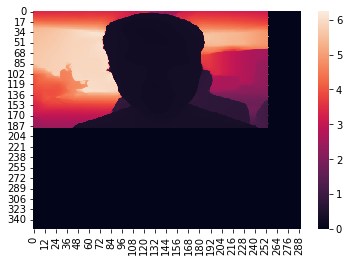

In [52]:
sns.heatmap(depth_array, )